# CSC 732 Pattern Recognition and Neural Networks
Instructor: Dr. Natacha Gueorguieva

Contributors:

Robert Kigobe,
Aayushi Chirag Thakkar,
Nikitha Pulluri

Date: 09-september-2021

QN: Part 1

In [1]:
# increase width of jupyter notebook cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# pandas is an open source,  high-performance library with , easy-to-use data structures and data analysis tools for the Python programming language.
import pandas as pd 
from pandas.plotting import scatter_matrix

# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

#sklearn Built on NumPy, SciPy, and matplotlib also used for data analysis
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

#numpy used to manipulate numerical data in python
import numpy as np

# Import and explore dataset
## read_csv() pandas function 

In [3]:
#Import the dataset
dataset = pd.read_csv ('seeds_dataset.csv', header=None) 

## set up column names

In [4]:
#Setup the column names
dataset.columns= ['area','perimeter','compactness', 'kernel length',   'kernel width',  'asymmetry coefficient', 'kernel groove Length']
print (dataset)


      area  perimeter  compactness  kernel length  kernel width  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
..     ...        ...          ...            ...           ...   
205  12.19      13.20       0.8783          5.137         2.981   
206  11.23      12.88       0.8511          5.140         2.795   
207  13.20      13.66       0.8883          5.236         3.232   
208  11.84      13.21       0.8521          5.175         2.836   
209  12.30      13.34       0.8684          5.243         2.974   

     asymmetry coefficient  kernel groove Length  
0                    2.221                 5.220  
1                    1.018                 4.956  
2                    2.699                

In [5]:
# Print shape of dataset
print(dataset.shape)

(210, 7)


In [6]:
# Peak at first 20 lines of dataset
print(dataset.head(20))

     area  perimeter  compactness  kernel length  kernel width  \
0   15.26      14.84       0.8710          5.763         3.312   
1   14.88      14.57       0.8811          5.554         3.333   
2   14.29      14.09       0.9050          5.291         3.337   
3   13.84      13.94       0.8955          5.324         3.379   
4   16.14      14.99       0.9034          5.658         3.562   
5   14.38      14.21       0.8951          5.386         3.312   
6   14.69      14.49       0.8799          5.563         3.259   
7   14.11      14.10       0.8911          5.420         3.302   
8   16.63      15.46       0.8747          6.053         3.465   
9   16.44      15.25       0.8880          5.884         3.505   
10  15.26      14.85       0.8696          5.714         3.242   
11  14.03      14.16       0.8796          5.438         3.201   
12  13.89      14.02       0.8880          5.439         3.199   
13  13.78      14.06       0.8759          5.479         3.156   
14  13.74 

## Generate descriptive statistics can be achieved with dataset.describe()

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided.

In [7]:

print(dataset.describe())

             area   perimeter  compactness  kernel length  kernel width  \
count  210.000000  210.000000   210.000000     210.000000    210.000000   
mean    14.847524   14.559286     0.870999       5.628533      3.258605   
std      2.909699    1.305959     0.023629       0.443063      0.377714   
min     10.590000   12.410000     0.808100       4.899000      2.630000   
25%     12.270000   13.450000     0.856900       5.262250      2.944000   
50%     14.355000   14.320000     0.873450       5.523500      3.237000   
75%     17.305000   15.715000     0.887775       5.979750      3.561750   
max     21.180000   17.250000     0.918300       6.675000      4.033000   

       asymmetry coefficient  kernel groove Length  
count             210.000000            210.000000  
mean                3.700201              5.408071  
std                 1.503557              0.491480  
min                 0.765100              4.519000  
25%                 2.561500              5.045000  
50%   

In [8]:
# Print class distribution of dataset
print(dataset.groupby('area').size())

area
10.59    1
10.74    1
10.79    1
10.80    1
10.82    1
        ..
20.24    1
20.71    1
20.88    1
20.97    1
21.18    1
Length: 193, dtype: int64


# Visualize dataset

## Box or whisker Plots


A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.

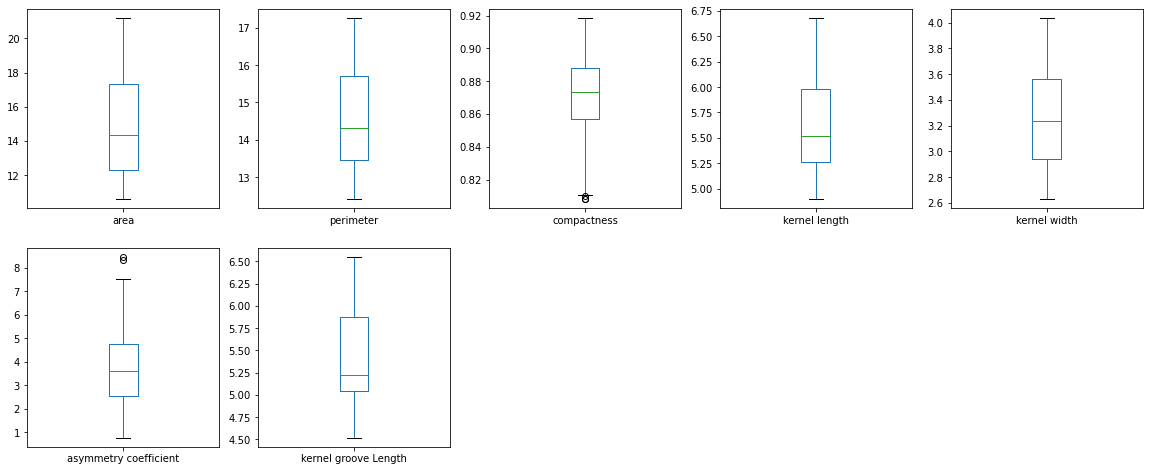

In [9]:

dataset.plot(kind='box', subplots=True, layout=(7,5), sharex=False, sharey=False, figsize=(20,30))
plt.show()

According to the box plots, it can be seen that the kernel groove length has the median far away from the true middle of the box which could indicate that the data is skewed for the column.

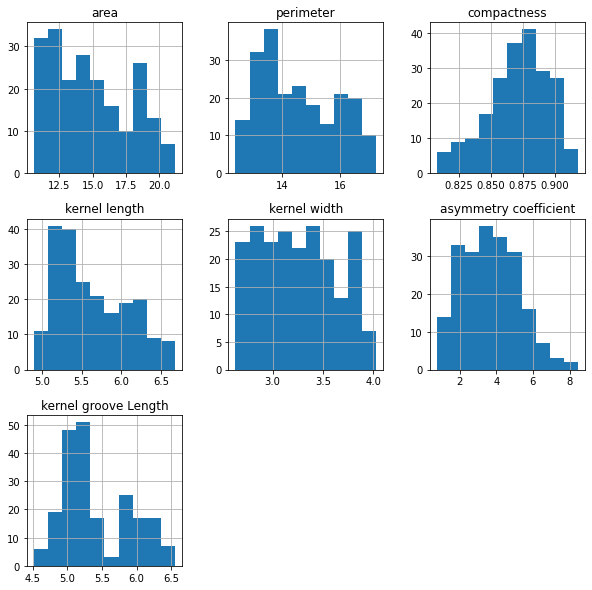

In [10]:
# histograms
dataset.hist(figsize=(10,10))
plt.show()

considering the assymentry coefficient, compactness, we see that the the histograms are bell shaped incating that the data is uni modal.thus a good sign of good data distribution.

considering area,perimeter,kernel length and kernel width, the histograms are Right-Skewed. this is an indication that this is a unimodal data set, with the mode closer to the left of the graph and smaller than either the mean or the median. This also indicated that the mean is located to the right side of the graph and will be a greater value than either the median or the mode. This shape indicates that there are a number of data points, perhaps outliers, that are greater than the mode.

The kernel groove length has two bell shapes indicating bi-modal behavior

## scatter plot matrix

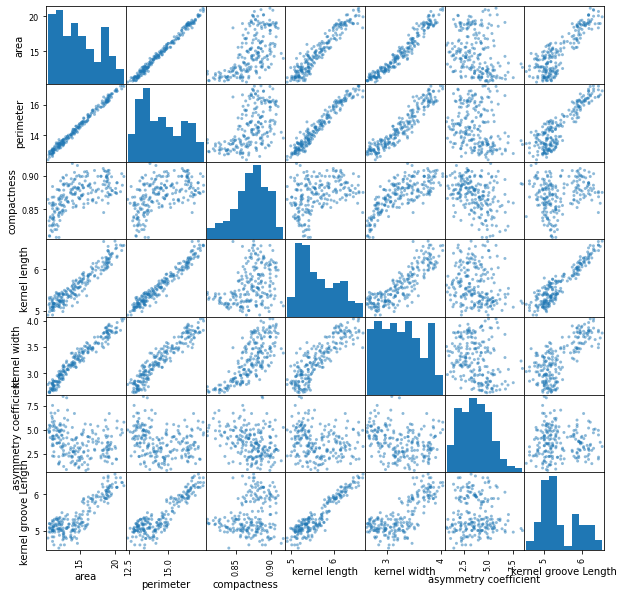

In [11]:

scatter_matrix(dataset, figsize=(10,10))
plt.show()

there is a good concentration of the data on the regression line indicationg that most of the data is rightly placed. the outliers can also be seemainly in the assymetry coeficcient and the kernel groove length.